In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
df = pd.read_csv("full_cleaned_lyrics.csv", index_col=0)
df

,year,genre,lyrics,wordcount,uniquewordcount
41404,2015,Pop,petite marie je parle de toi parce qu avec ta ...,247,99
315269,2007,Country,writer doug supernaw take like man go shake ha...,62,53
250875,2006,Rock,amount nothing nothing something say please so...,61,41
260631,2007,Pop,end saw today turn heart away smile like sun k...,81,66
165453,2012,Pop,way get want become human dear sweet child liv...,235,167
104418,2007,Rock,bet cha bullets surely blow back hell go lick ...,82,45
296010,2006,Pop,wrap tangle free undecided believe alright ton...,64,40
18489,2005,Country,walk air float sky float air walk air float mo...,71,54
111431,2009,Rock,turn corner familiar turn around past oh hide ...,140,69
270743,2013,Country,high lonesome road heaven bless abide many yea...,114,76


In [4]:
# Groupby by genre
genre = df.groupby("genre")

# Summary statistic of all genres
genre.describe().head()

uniquewordcount                                                    \
                  count        mean        std   min    25%    50%    75%   
genre                                                                       
Country          2792.0   58.498926  25.782529  10.0   42.0   53.0   69.0   
Hip-Hop          4817.0  160.743409  75.566184   2.0  107.0  157.0  206.0   
Indie             529.0   57.892250  30.905613   8.0   40.0   52.0   68.0   
Pop              7432.0   63.756728  30.232246   5.0   45.0   57.0   74.0   
R&B               615.0   55.471545  24.128566   8.0   41.0   51.0   64.0   

               wordcount               ...                      year  \
           max     count        mean   ...       75%     max   count   
genre                                  ...                             
Country  304.0    2792.0  100.709885   ...    120.25   666.0  2792.0   
Hip-Hop  747.0    4817.0  285.280465   ...    359.00  1666.0  4817.0   
Indie    371.0     529.0  107.858223   ...    126.00   943.0   529.0   
Pop      308.0    7432.0  140.141012   ...    173.00   671.0  7432.0   
R&B      200.0     615.0  114.614634   ...    137.00   397.0   615.0   

                                                                         
                mean        std     min     25%     50%     75%     max  
genre                                                                    
Country  2007.633954   4.711752  1971.0  2006.0  2007.0  2009.0  2016.0  
Hip-Hop  2007.999585  39.309171    67.0  2006.0  2008.0  2012.0  2016.0  
Indie    2010.964083   3.458169  2001.0  2008.0  2011.0  2014.0  2016.0  
Pop      2008.312702   5.075732  1971.0  2006.0  2007.0  2012.0  2016.0  
R&B      2006.455285   8.232426  1970.0  2006.0  2007.0  2012.0  2016.0  

[5 rows x 24 columns]

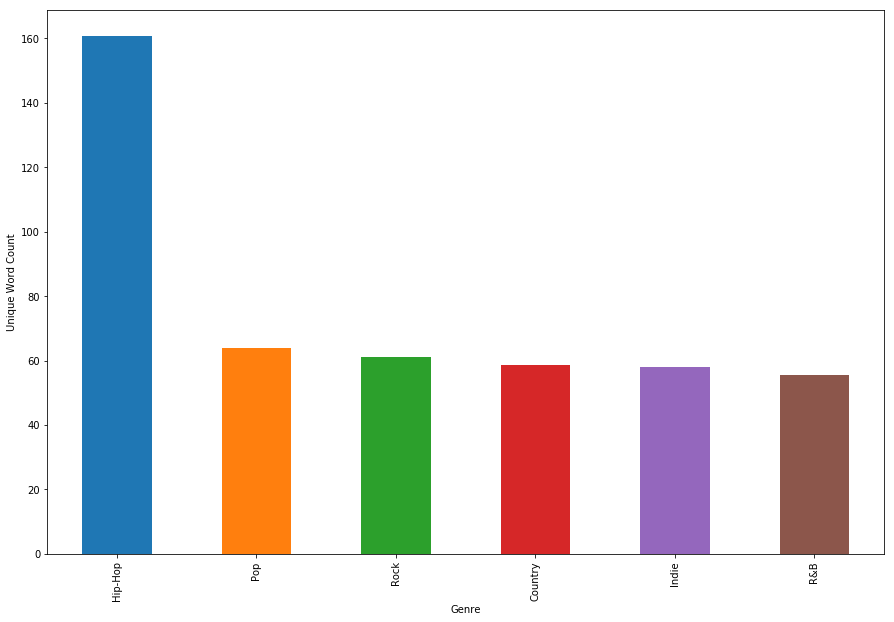

In [5]:
plt.figure(figsize=(15,10))
genre.mean().sort_values(by="uniquewordcount",ascending=False)["uniquewordcount"].plot.bar()
plt.xlabel("Genre")
plt.ylabel("Unique Word Count")
plt.show()

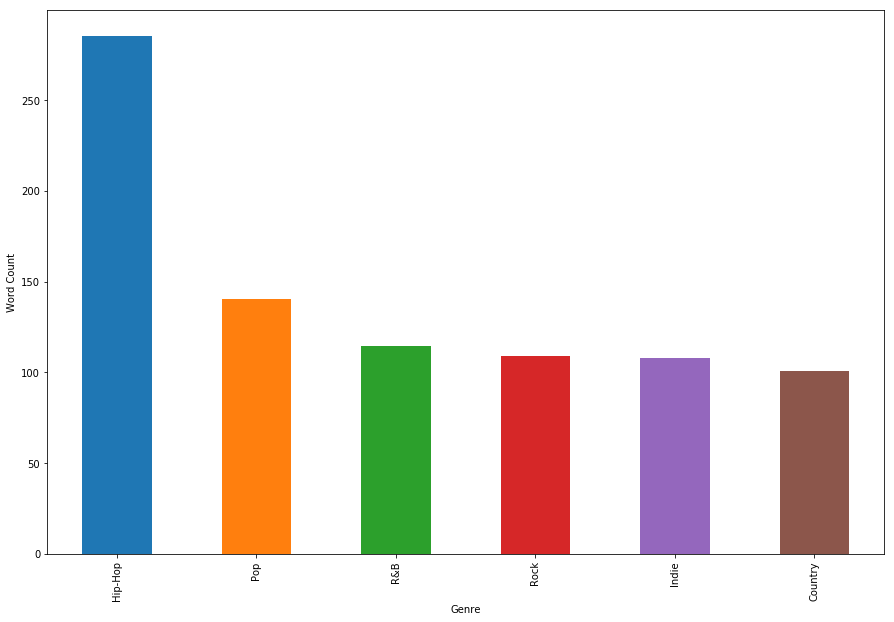

In [6]:
plt.figure(figsize=(15,10))
genre.mean().sort_values(by="wordcount",ascending=False)["wordcount"].plot.bar()
plt.xlabel("Genre")
plt.ylabel("Word Count")
plt.show()

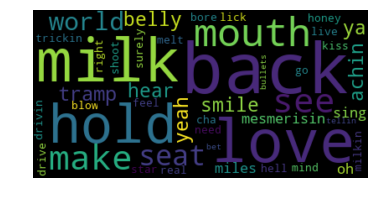

In [7]:
# Start with one review:
text = df.iloc[5]['lyrics']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

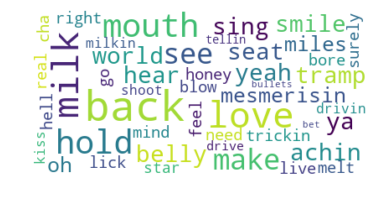

In [8]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

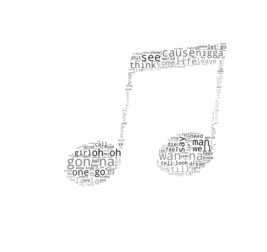

In [9]:
# FOR ALL THE SONGS IN OUR DATASET
text = " ".join(lyric for lyric in df.lyrics)
allmask = np.array(Image.open( "all.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask =allmask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(allmask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("allcloud.png")

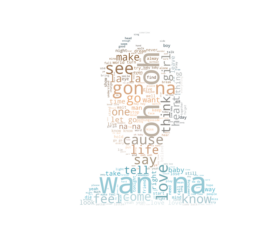

In [10]:
popdf = df[df.genre=='Pop']
text = " ".join(lyric for lyric in popdf.lyrics)
popmask = np.array(Image.open( "pop.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask =popmask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(popmask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("popcloud.png")

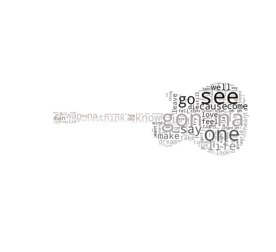

In [14]:
rockdf = df[df.genre=='Rock']
text = " ".join(lyric for lyric in rockdf.lyrics)
rockmask = np.array(Image.open( "guitar.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask=rockmask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(rockmask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("rockcloud.png")

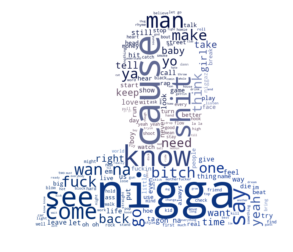

In [13]:
hiphopdf = df[df.genre=='Hip-Hop']
text = " ".join(lyric for lyric in hiphopdf.lyrics)
hiphopmask = np.array(Image.open( "hiphop.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask = hiphopmask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(hiphopmask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("hiphopcloud.png")

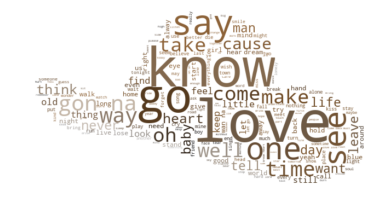

In [15]:
countrydf = df[df.genre=='Country']
text = " ".join(lyric for lyric in countrydf.lyrics)
countrymask = np.array(Image.open( "country.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask = countrymask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(countrymask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("countrycloud.png")

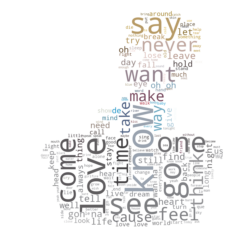

In [16]:
indiedf = df[df.genre=='Indie']
text = " ".join(lyric for lyric in indiedf.lyrics)
indiemask = np.array(Image.open( "indie.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask = indiemask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(indiemask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("indiecloud.png")

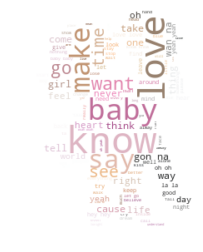

In [17]:
rbdf = df[df.genre=='R&B']
text = " ".join(lyric for lyric in rbdf.lyrics)
rbmask = np.array(Image.open( "rb.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask = rbmask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(rbmask)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wordcloud.to_file("rbcloud.png")